## Exercises

The end result of this exercise should be a file named prepare.py.

Using your store items data:

- 1. Convert date column to datetime format.

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import combined_data
from prepare import prep_combine

In [2]:
df = combined_data()
df.head(3)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
#right now it is an object
df.dtypes

item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

In [4]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [5]:
#checking for quality assurance
df.dtypes

item_id                        int64
sale_amount                  float64
sale_date        datetime64[ns, UTC]
sale_id                        int64
store_id                       int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
item_brand                    object
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
dtype: object

## 2. Plot the distribution of sale_amount and item_price.

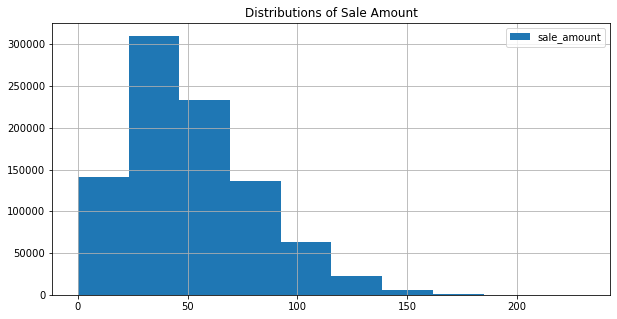

In [6]:
#distributuon of sale amount, and item price
plt.figure(figsize=(10,5))
df.sale_amount.hist(label='sale_amount')
plt.legend()
plt.title('Distributions of Sale Amount')
plt.show()

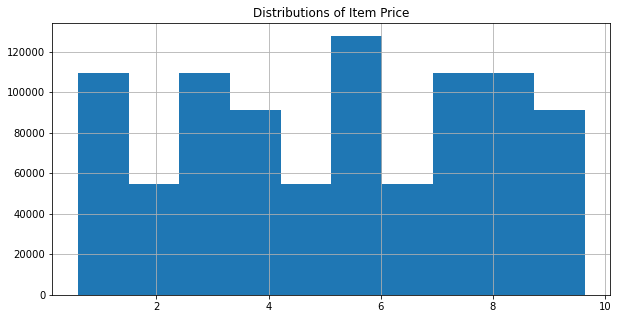

In [7]:
plt.figure(figsize=(10,5))
df.item_price.hist(label='item_price')
plt.title('Distributions of Item Price')
plt.show()

## 3. Set the index to be the datetime variable.

In [8]:
df = df.set_index("sale_date").sort_index()

## 4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()


In [10]:
df.head(3)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
df['sales_total'] = df.sale_amount * df.item_price

In [12]:
df.head(3)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# see my prepare.py file

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.

In [15]:
df = pd.read_csv('germany_power.csv', index_col=0)

In [16]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
df['Date'] = pd.to_datetime(df.Date)

## 2. Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

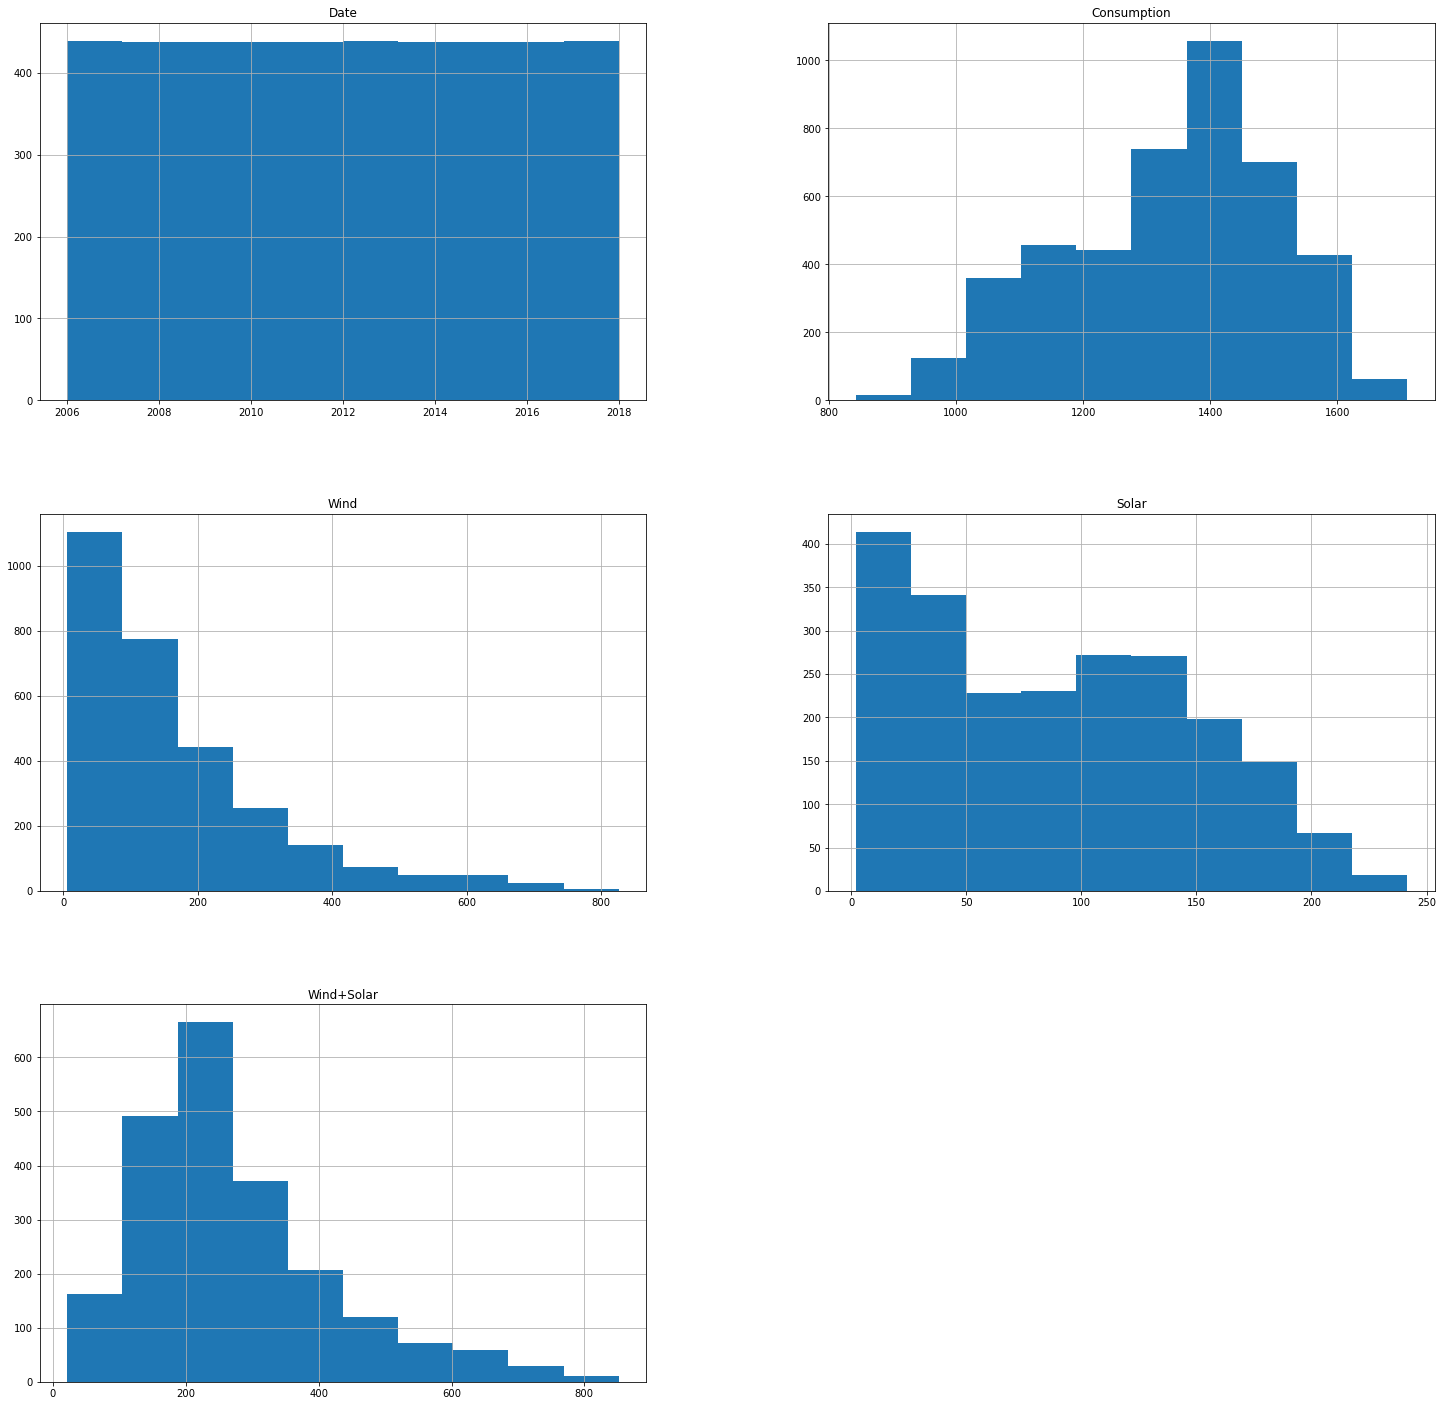

In [18]:
df.hist(figsize=(25,25))

## 3. Set the index to be the datetime variable.

In [19]:
df = df.set_index('Date').sort_index()

In [20]:
df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


## 4. Add a month and a year column to your dataframe.

In [21]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

In [23]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


## 5. Fill any missing values.

In [24]:
df.fillna(0, inplace=True)

In [25]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [26]:
# check to make sure that the wind+solar column matches actual wind plus solar values
df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2010-01-01,1057.37200,48.709,0.000,0.000,January,2010
2010-01-02,1161.04200,24.628,0.000,0.000,January,2010
2010-01-03,1132.06900,22.963,0.000,0.000,January,2010
2010-01-04,1346.25000,59.318,0.000,0.000,January,2010
2010-01-05,1457.37400,41.624,0.000,0.000,January,2010
...,...,...,...,...,...,...
2017-12-25,1111.28338,587.810,15.765,603.575,December,2017
2017-12-26,1130.11683,717.453,30.923,748.376,December,2017
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017


In [27]:
df['wind_solar_custm'] = df['Wind'] + df['Solar']

In [28]:
df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])][['Wind', 'Solar', 'Wind+Solar', 'wind_solar_custm']]

,Wind,Solar,Wind+Solar,wind_solar_custm
Date,,,,
2010-01-01,48.709,0.000,0.000,48.709
2010-01-02,24.628,0.000,0.000,24.628
2010-01-03,22.963,0.000,0.000,22.963
2010-01-04,59.318,0.000,0.000,59.318
2010-01-05,41.624,0.000,0.000,41.624
...,...,...,...,...
2017-12-25,587.810,15.765,603.575,603.575
2017-12-26,717.453,30.923,748.376,748.376
2017-12-27,394.507,16.530,411.037,411.037


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# see my perpare.py file